In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 0. Ładowanie Danych

In [65]:
def load_data():
    df = pd.read_csv("smartphone_activity_dataset.csv")
    return df

In [66]:
def load_description():
    attributes = pd.read_csv("attributes_smartphone_activity.csv")
    return attributes

In [67]:
df = load_data()

In [70]:
dscr = load_description()

#### 1. Podział zbioru

In [71]:
y = df["activity"]
X = df.drop(['activity'],axis=1)

In [72]:
def split_data(df):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, stratify=y, test_size=0.3, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
    )
    return X_train, X_val, X_test, y_train, y_val, y_test 

In [73]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df)

In [74]:
print("X_train:",len(X_train))
print("y_train:",len(y_train))
print("X_val:",len(X_val))
print("y_val:",len(y_val))
print("X_test:",len(X_test))
print("y_test:",len(y_test))

X_train: 7209
y_train: 7209
X_val: 2163
y_val: 2163
X_test: 927
y_test: 927


#### 2. Wybór parametrów

    Nad tym elementem chcemy jeszcze popracować. Nie jest on skończony

In [121]:
def remove_correlated(df):
    # Create a mask for values above 65%
    # But also below 100% since variables correlated with themselves
    correlation = df.corr(method='spearman')
    mask = (abs(correlation > 0.65) & (correlation < 1.0))
    high_corr = correlation[mask]

    # Create a new column mask using any() and ~
    col_to_filter_out = ~high_corr[mask].any()

    # Apply new mask
    df_clean = df[high_corr.columns[col_to_filter_out]]

    # Visualize cleaned dataset
    return df_clean

In [120]:
X_train_clean = remove_correlated(X_train)
X_train_clean

,feature_1,feature_2,feature_3,feature_29,feature_33,feature_37,feature_38,feature_39,feature_40,feature_64,...,feature_512,feature_525,feature_538,feature_551,feature_555,feature_556,feature_557,feature_558,feature_560,feature_561
4111,0.284,-0.0275,-0.0996,-0.02210,-0.1020,0.30500,-0.4360,-0.2570,0.4870,-1.000,...,-0.724,-0.8730,-0.795,-0.873,-0.2430,-0.3760,0.264,-0.5260,0.3510,0.1870
8040,0.254,-0.0195,-0.1090,0.07430,-0.1350,0.36500,0.7330,-0.0240,-0.0262,-0.459,...,-0.931,-1.0000,-0.949,-1.000,-0.0950,-0.2320,0.145,-0.0162,-0.0440,-0.9030
7234,0.270,-0.0190,-0.1040,-0.02740,-0.0897,0.01510,0.2030,-0.3730,-0.1340,-0.981,...,-0.862,-0.7460,-1.000,-0.683,0.0345,0.1180,-0.236,0.5070,-0.5510,-0.4490
833,0.297,-0.0021,-0.0866,0.14800,-0.0206,-0.13300,-0.2070,0.0677,0.3090,-1.000,...,-0.517,-0.9050,-0.538,-0.905,-0.1100,-0.7600,-0.924,-0.0516,0.2410,0.0410
2552,0.277,-0.0215,-0.1070,0.03740,-0.2540,-0.05570,-0.1140,-0.3010,0.1910,-1.000,...,-0.310,0.0794,-1.000,-0.905,-0.0381,0.2490,-0.296,0.2120,0.1830,-0.0701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0.252,-0.0155,-0.0701,0.14600,-0.1900,0.06930,-0.4270,-0.1010,0.1530,-1.000,...,-0.793,-0.9050,-0.846,-0.905,0.3090,0.8380,0.928,-0.4190,0.3600,0.0812
5920,0.275,-0.0184,-0.1000,0.23800,-0.0392,-0.05170,0.5050,-0.8000,-0.6180,-1.000,...,-1.000,-0.7460,-1.000,-0.937,-0.1380,0.0139,-0.429,0.4090,-0.2050,-0.3360
1451,0.212,-0.0144,-0.1660,0.13200,-0.1960,-0.10600,-0.2370,-0.2900,0.2660,-1.000,...,-0.793,-0.9050,-0.949,-0.905,0.1030,-0.4900,0.939,-0.9600,0.2070,0.3590
1307,0.307,-0.0233,-0.1960,-0.00657,-0.3610,-0.36900,-0.4930,-0.5380,0.2440,-1.000,...,-0.448,-0.9050,-0.949,-0.905,-0.1560,-0.9210,0.934,0.5540,0.3260,0.0357


In [122]:
def get_best_features(X,y,n):
    X_copy = X.copy()
    X_copy["activity"] = y
    corr_matrix = X_copy.corr(method = 'spearman').abs()
    corr_matrix = corr_matrix["activity"]
    return corr_matrix.nlargest(n).iloc[1:].index.tolist()

In [123]:
selected_features = get_best_features(X_train_clean, y_train, 10)

<AxesSubplot:>

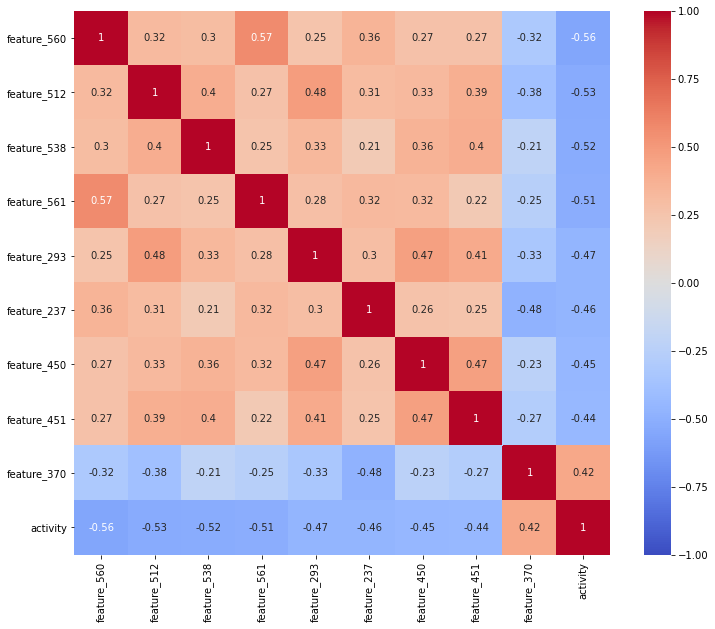

In [125]:
#corr map on shorter dataset
X_train_copy = X_train[selected_features].copy()
X_train_copy["activity"] = y_train
plt.figure(figsize=(12, 10))
sns.heatmap(X_train_copy.corr(method='spearman'), vmin=-1, vmax=1, cmap='coolwarm', annot = True)

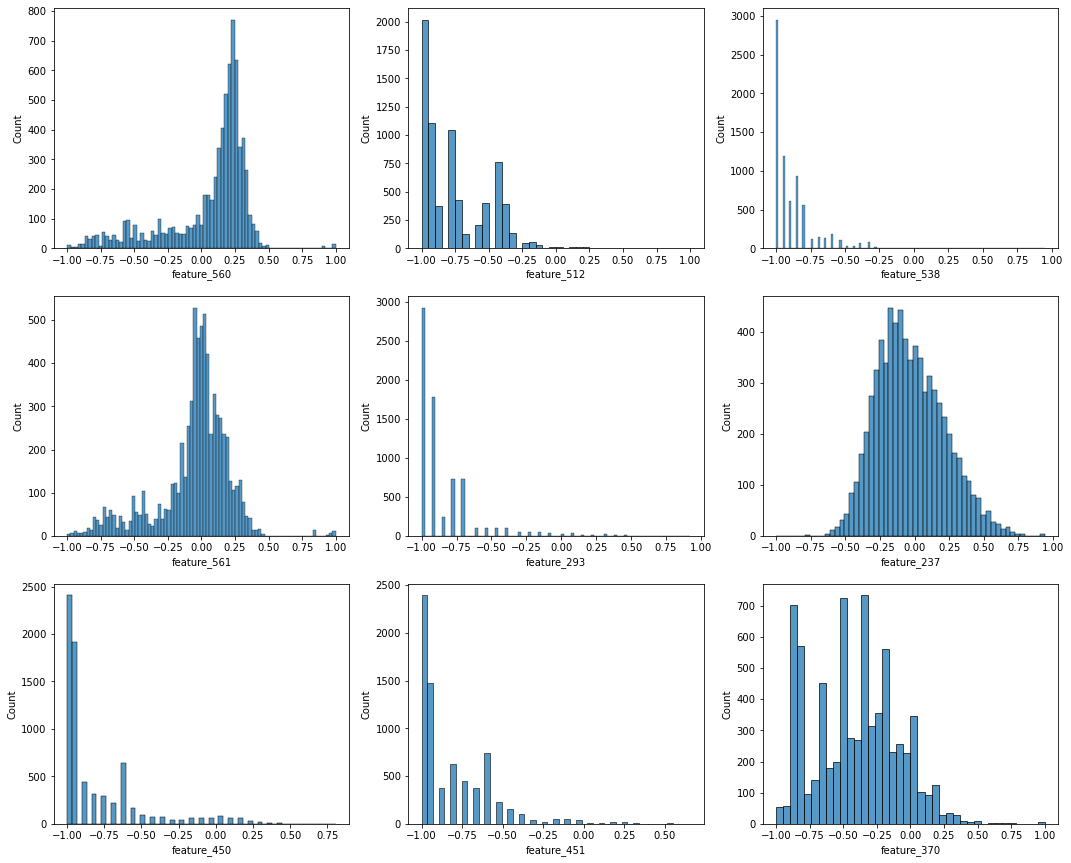

In [126]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
for i in range(len(selected_features)):
    sns.histplot(ax=axes[i // 3, i % 3], data=X_train, x=selected_features[i])

<AxesSubplot:xlabel='activity', ylabel='Count'>

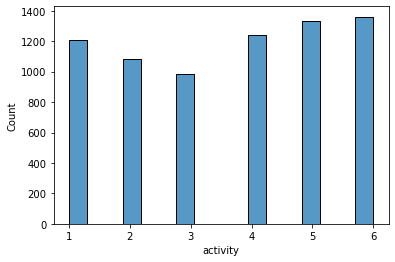

In [84]:
sns.histplot(y_train)

#### 3. Przygotowanie Modeli

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [95]:
class FeatureSelector:
    def __init__(self, features):
        self.features = features

    def transform(self, X, y=None):
        return X.loc[:,self.features]

    def fit(self, X, y=None):
        return self

In [ ]:
preprocessor = Pipeline(
    steps=[
        ('feat_selector', FeatureSelector(features=selected_features)),
        ('scaler', StandardScaler())
        ])

In [163]:
rfc = Pipeline(
    steps=[
        ('preproc', preprocessor),
        ('random_forest_classifier', RandomForestClassifier(random_state=42, n_estimators=25, max_depth=20))
    ]
)

xgbc = Pipeline(
    steps=[
        ('preproc', preprocessor),
        ('xgboost_classifier', XGBClassifier(random_state=42, n_estimators=25, eval_metric='mlogloss'))
    ]
)

logreg = Pipeline(
    steps=[
        ('preproc', preprocessor),
        ('logistic_regressor', LogisticRegression(multi_class="multinomial", max_iter=5000))
    ]
)

adb = Pipeline(
    steps=[
        ('preproc', preprocessor),
        ('adaboost', AdaBoostClassifier(random_state=42))
    ]
)

In [104]:
def print_scores(y_val, y_pred):
    print("accuracy: ", accuracy_score(y_val, y_pred))
    print("precision: ", precision_score(y_val, y_pred, average='macro'))
    print("recall: ", recall_score(y_val, y_pred, average='macro'))
    print("f1: ", f1_score(y_val, y_pred, average='macro'))

#### 4. Ewaluacja Modeli

#### Random Forest Classifier

In [164]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)
print_scores(y_val, y_pred)

accuracy:  0.9047619047619048
precision:  0.9019485956974367
recall:  0.9033837050516175
f1:  0.9024211425341075


#### Logistic Regression

In [108]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
print_scores(y_val, y_pred)

accuracy:  0.7817845584835876
precision:  0.7785416014783375
recall:  0.7775754769904295
f1:  0.7767130632457432


#### XGBClassifier

In [117]:
%%capture --no-stdout
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_val)
print_scores(y_val, y_pred)

accuracy:  0.9186315302820157
precision:  0.9154634821422946
recall:  0.9163398264624915
f1:  0.9158239477652494


#### AdaBoost

In [129]:
%%capture --no-stdout
adb.fit(X_train, y_train)
y_pred = adb.predict(X_val)
print_scores(y_val, y_pred)

accuracy:  0.3892741562644475
precision:  0.3721447928765002
recall:  0.34807864164432534
f1:  0.25672148112741283


Pod względem ```accuracy``` zdecydowanymi zwycięzcami są RFC i XGBC. Regresja logistyczna wypada nieco gorzej jednak najprawdopodobniej jest to spowodowane złym doborem informatywnych atrybutów.

#### Co dalej?

    1. Chcemy lepiej przewidywać, które zmienne powinniśmy używać
    
    2. Sprawdzić jaki wpływ ma liczba zmiennych na overfitowanie
    
    3. Wybrać najlepszy model wraz z najlepszymi hiperparametrami